In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
class_names = ['airplane', 
               'automobile', 
               'bird', 
               'cat', 
               'dear', 
               'dog', 
               'frog', 
               'horse', 
               'ship', 
               'truck']

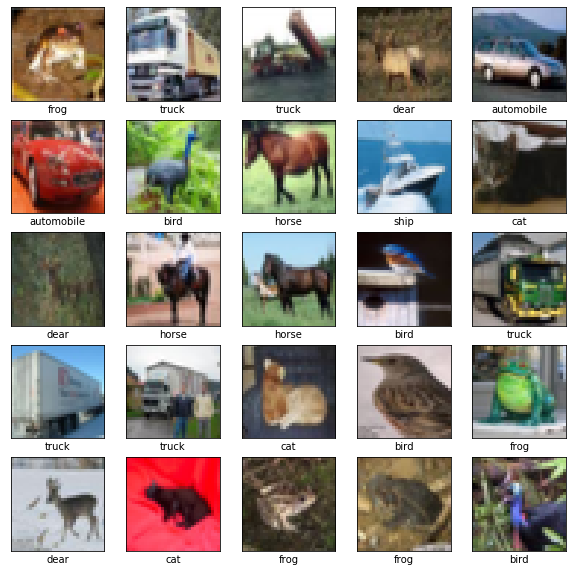

In [4]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, epochs=10,
                   validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 34s 681us/sample - loss: 1.8305 - acc: 0.3684 - val_loss: 1.4297 - val_acc: 0.4795
Epoch 2/10
50000/50000 [==============================] - 34s 680us/sample - loss: 1.3572 - acc: 0.5125 - val_loss: 1.3268 - val_acc: 0.5322
Epoch 3/10
50000/50000 [==============================] - 34s 680us/sample - loss: 1.2045 - acc: 0.5755 - val_loss: 1.1946 - val_acc: 0.5831
Epoch 4/10
50000/50000 [==============================] - 34s 678us/sample - loss: 1.1016 - acc: 0.6148 - val_loss: 1.1294 - val_acc: 0.6061
Epoch 5/10
50000/50000 [==============================] - 34s 677us/sample - loss: 1.0140 - acc: 0.6448 - val_loss: 1.0290 - val_acc: 0.6479
Epoch 6/10
50000/50000 [==============================] - 34s 674us/sample - loss: 0.9537 - acc: 0.6690 - val_loss: 1.0279 - val_acc: 0.6466
Epoch 7/10
50000/50000 [==============================] - 34s 684us/sample - loss: 0.9083 - acc: 0.6853 

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


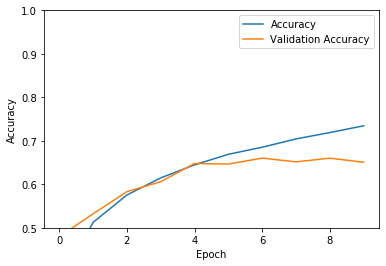

In [9]:
plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower_right')
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/10000 - 2s - loss: 1.1198 - acc: 0.6508


In [11]:
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

Test Loss:  1.1197878402709962
Test Accuracy:  0.6508
